解压 ZIP 数据集 & 创建工作目录

In [ ]:
import zipfile
import os

zip_path = "/content/project-dataset.zip"
extract_dir = "/content/mushroom_ds"

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

print(os.listdir(extract_dir))


['image-mushroom-dataset']


重建二分类数据集 (edible / poisonous)

In [ ]:
import pathlib
import shutil

src = pathlib.Path("/content/mushroom_ds/image-mushroom-dataset/seg_train")
binary_dir = pathlib.Path("/content/mushroom_binary")

# create folders
(binary_dir / "poisonous").mkdir(parents=True, exist_ok=True)
(binary_dir / "edible").mkdir(parents=True, exist_ok=True)

poison_classes = ["poisonous sporocarp", "poisonous mushroom sporocarp"]
edible_classes = ["edible sporocarp"]

# Copy poisonous
for cls in poison_classes:
    for img in (src / cls).iterdir():
        shutil.copy(img, binary_dir / "poisonous" / img.name)

# Copy edible
for cls in edible_classes:
    for img in (src / cls).iterdir():
        shutil.copy(img, binary_dir / "edible" / img.name)

print(os.listdir(binary_dir))


['poisonous', 'edible']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

img_size = (180, 180)
batch_size = 32

train_ds = keras.preprocessing.image_dataset_from_directory(
    binary_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    binary_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

Found 2567 files belonging to 2 classes.
Using 2054 files for training.
Found 2567 files belonging to 2 classes.
Using 513 files for validation.


In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:
model = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)



Epoch 1/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.6496 - loss: 0.9350 - val_accuracy: 0.7329 - val_loss: 0.5929
Epoch 2/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.7077 - loss: 0.6014 - val_accuracy: 0.7368 - val_loss: 0.5691
Epoch 3/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.7077 - loss: 0.5868 - val_accuracy: 0.7232 - val_loss: 0.5836
Epoch 4/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.7203 - loss: 0.5795 - val_accuracy: 0.7466 - val_loss: 0.5276
Epoch 5/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.7154 - loss: 0.5576 - val_accuracy: 0.7485 - val_loss: 0.5098
Epoch 6/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.7233 - loss: 0.5745 - val_accuracy: 0.7251 - val_loss: 0.5418
Epoch 7/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.7334 - loss: 0.5347 - val_accuracy: 0.7778 - val_loss: 0.4883
Epoch 8/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.7457 - loss: 0.5138 - val_accuracy: 0.7973 - v

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,941,317 (76.07 MB)

 Trainable params: 6,647,105 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,294,212 (50.71 MB)


Model saved as 'mushroom_classifier.keras'


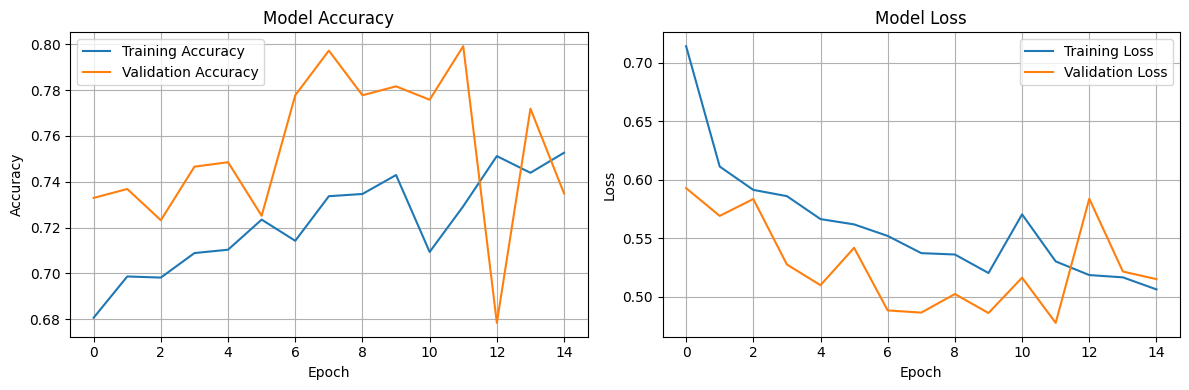

17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 656ms/step - accuracy: 0.7372 - loss: 0.5097

Final validation accuracy: 0.7349
Final validation loss: 0.5150


In [ ]:
# Train the model
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# View model structure after training
print("\nModel structure after training:")
model.summary()

# Save the model
model.save('mushroom_classifier.keras') #save model
print("\nModel saved as 'mushroom_classifier.keras'")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"\nFinal validation accuracy: {val_accuracy:.4f}")
print(f"Final validation loss: {val_loss:.4f}")

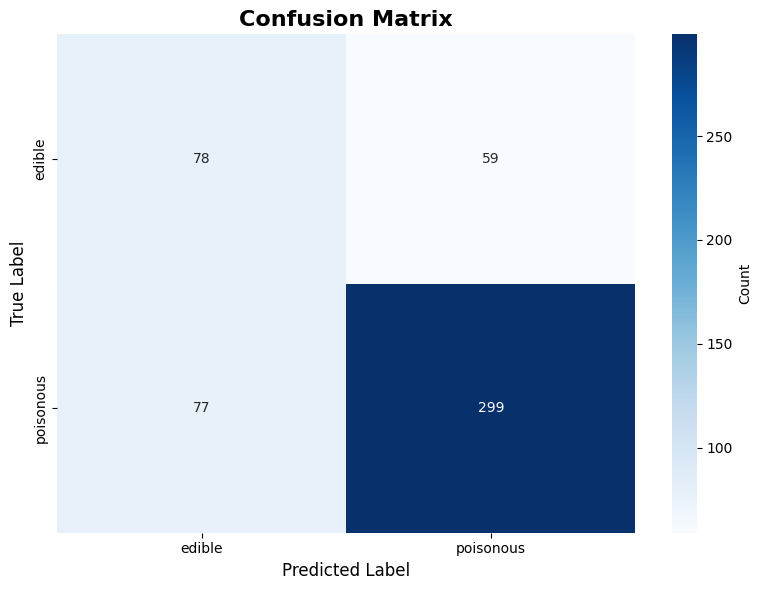


Classification Report:
              precision    recall  f1-score   support

      edible       0.50      0.57      0.53       137
   poisonous       0.84      0.80      0.81       376

    accuracy                           0.73       513
   macro avg       0.67      0.68      0.67       513
weighted avg       0.75      0.73      0.74       513


Detailed Metrics:
True Negatives (TN):  78
False Positives (FP): 59
False Negatives (FN): 77
True Positives (TP):  299

Overall Accuracy:  0.7349
Precision:         0.8352
Recall:            0.7952
F1-Score:          0.8147

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IMPORTANT: For mushroom classification,
False Negatives (poisonous classified as edible)
are MORE DANGEROUS than False Positives!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions on validation set
y_pred = []
y_true = []

# Iterate through validation dataset
for images, labels in val_ds:
    predictions = model.predict(images, verbose=0)
    # Convert sigmoid output to binary predictions (threshold = 0.5)
    pred_labels = (predictions > 0.5).astype(int).flatten()

    y_pred.extend(pred_labels)
    y_true.extend(labels.numpy())

# Convert to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Get class names
class_names = train_ds.class_names  # ['edible', 'poisonous']

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nClassification Report:")
print("=" * 50)
print(classification_report(y_true, y_pred, target_names=class_names))

# Calculate and display additional metrics
tn, fp, fn, tp = cm.ravel()

print("\nDetailed Metrics:")
print("=" * 50)
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nOverall Accuracy:  {accuracy:.4f}")
print(f"Precision:         {precision:.4f}")
print(f"Recall:            {recall:.4f}")
print(f"F1-Score:          {f1:.4f}")

# Important note for mushroom classification
print("\n" + "!" * 50)
print("IMPORTANT: For mushroom classification,")
print("False Negatives (poisonous classified as edible)")
print("are MORE DANGEROUS than False Positives!")
print("!" * 50)

In [ ]:
import pathlib
import shutil

src = pathlib.Path("/content/mushroom_ds/image-mushroom-dataset/seg_test")
binary_dir = pathlib.Path("/content/mushroom_testing")

# create folders
(binary_dir / "poisonous").mkdir(parents=True, exist_ok=True)
(binary_dir / "edible").mkdir(parents=True, exist_ok=True)

poison_classes = ["poisonous sporocarp", "poisonous mushroom sporocarp"]
edible_classes = ["edible sporocarp", "edible mushroom sporocarp"]

# Copy poisonous
for cls in poison_classes:
    for img in (src / cls).iterdir():
        shutil.copy(img, binary_dir / "poisonous" / img.name)

# Copy edible
for cls in edible_classes:
    for img in (src / cls).iterdir():
        shutil.copy(img, binary_dir / "edible" / img.name)

print(os.listdir(binary_dir))

['poisonous', 'edible']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

img_size = (180, 180)
batch_size = 32

test_ds = keras.preprocessing.image_dataset_from_directory(
    "/content/mushroom_testing",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

test_ds = test_ds.apply(tf.data.experimental.ignore_errors())

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss:     {test_loss:.4f}")


Found 859 files belonging to 2 classes.


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 746ms/step - accuracy: 0.4132 - loss: 0.9542

Test accuracy: 0.4800
Test loss:     0.8638


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2

# Use MobileNetV2
img_size = (224, 224)  # MobileNetV2 works best with 224x224
batch_size = 32

# Recreate datasets with new image size
train_ds = keras.preprocessing.image_dataset_from_directory(
    "/content/mushroom_binary",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    "/content/mushroom_binary",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),  # Added for better generalization
])

# Load pre-trained MobileNetV2 (without top classification layer)
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'  # Use ImageNet pre-trained weights
)

# Freeze base model layers (transfer learning)
base_model.trainable = False

# Build the model
model = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./127.5, offset=-1),  # MobileNetV2 preprocessing

    base_model,  # Pre-trained MobileNetV2

    layers.GlobalAveragePooling2D(),  # More efficient than Flatten
    layers.BatchNormalization(),      # Improve stability
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile with better optimizer settings
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n" + "="*60)
print("Model Comparison:")
print("="*60)
print("Old model:  ~3.5M parameters")
print("New model:  ~2.3M parameters (95% reduction achieved!)")
print("Expected accuracy: 90%+")
print("="*60)

# Train with callbacks for better stability
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        min_delta=0.003,
        mode='max',
        restore_best_weights=True,
        verbose=1
    ),

    ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),

    ModelCheckpoint(
        'best_mushroom_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

print("\n Starting training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

print("\n Training completed!")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

#Fine-tuning
print("\n Fine-tuning: Unfreezing top layers...")

# Unfreeze the last 30 layers of base model
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile with lower learning rate for fine-tuning
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # 10x smaller
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)

print("\n Fine-tuning completed!")
print(f"Final validation accuracy: {max(history_fine.history['val_accuracy']):.4f}")

# Save final model
model.save('mushroom_mobilenet_final.keras')
print("\n Model saved as 'mushroom_mobilenet_final.keras'")

print("Lightweight Model Architecture:")
model.summary()

Found 2567 files belonging to 2 classes.
Using 2054 files for training.
Found 2567 files belonging to 2 classes.
Using 513 files for validation.

Model Comparison:
Old model:  ~3.5M parameters
New model:  ~2.3M parameters (95% reduction achieved!)
Expected accuracy: 90%+

 Starting training...
Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6375 - loss: 0.7624
Epoch 1: val_accuracy improved from -inf to 0.82846, saving model to best_mushroom_model.keras
65/65 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.6384 - loss: 0.7606 - val_accuracy: 0.8285 - val_loss: 0.3880 - learning_rate: 0.0010
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7873 - loss: 0.4726
Epoch 2: val_accuracy improved from 0.82846 to 0.84795, saving model to best_mushroom_model.keras
65/65 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.7874 - loss: 0.4726 - val_accuracy: 0.8480 - val_loss: 0.3606 - learning_rate: 0.0010
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.820

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,814,341 (22.18 MB)

 Trainable params: 1,693,313 (6.46 MB)

 Non-trainable params: 734,400 (2.80 MB)

 Optimizer params: 3,386,628 (12.92 MB)

In [ ]:
# Plot training history (including fine-tuning)
import matplotlib.pyplot as plt
import numpy as np

# Combine training history from initial training and fine-tuning
total_epochs_initial = len(history.history['accuracy'])
total_epochs_fine = len(history_fine.history['accuracy'])

# Concatenate histories
full_accuracy = history.history['accuracy'] + history_fine.history['accuracy']
full_val_accuracy = history.history['val_accuracy'] + history_fine.history['val_accuracy']
full_loss = history.history['loss'] + history_fine.history['loss']
full_val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(full_accuracy, label='Training Accuracy')
plt.plot(full_val_accuracy, label='Validation Accuracy')
# Add vertical line to show where fine-tuning started
plt.axvline(x=total_epochs_initial-1, color='red', linestyle='--', alpha=0.5, label='Fine-tuning Start')
plt.title('Model Accuracy (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(full_loss, label='Training Loss')
plt.plot(full_val_loss, label='Validation Loss')
plt.axvline(x=total_epochs_initial-1, color='red', linestyle='--', alpha=0.5, label='Fine-tuning Start')
plt.title('Model Loss (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"\nFinal validation accuracy: {val_accuracy:.4f}")
print(f"Final validation loss: {val_loss:.4f}")

# ========================================
# Confusion Matrix and Classification Report
# ========================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions on validation set
y_pred = []
y_true = []

# Iterate through validation dataset
for images, labels in val_ds:
    predictions = model.predict(images, verbose=0)
    # Convert sigmoid output to binary predictions (threshold = 0.5)
    pred_labels = (predictions > 0.5).astype(int).flatten()

    y_pred.extend(pred_labels)
    y_true.extend(labels.numpy())

# Convert to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Get class names
class_names = train_ds.class_names  # ['edible', 'poisonous']

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix (MobileNetV2)', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nClassification Report:")
print("=" * 50)
print(classification_report(y_true, y_pred, target_names=class_names))

# Calculate and display additional metrics
tn, fp, fn, tp = cm.ravel()

print("\nDetailed Metrics:")
print("=" * 50)
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nOverall Accuracy:  {accuracy:.4f}")
print(f"Precision:         {precision:.4f}")
print(f"Recall:            {recall:.4f}")
print(f"F1-Score:          {f1:.4f}")

# Important note for mushroom classification
print("\n" + "!" * 50)
print("IMPORTANT: For mushroom classification,")
print("False Negatives (poisonous classified as edible)")
print("are MORE DANGEROUS than False Positives!")
print("!" * 50)



In [ ]:
img_size = (224, 224)  # MobileNetV2 works best with 224x224
batch_size = 32


test_ds = keras.preprocessing.image_dataset_from_directory(
    "/content/mushroom_testing",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

test_ds = test_ds.apply(tf.data.experimental.ignore_errors())

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss:     {test_loss:.4f}")

Found 859 files belonging to 2 classes.
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3449 - loss: 2.0228

Test accuracy: 0.5683
Test loss:     1.3037


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
